### What is Pandas

Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language.

https://pandas.pydata.org/about/index.html

### Pandas Series

A Pandas Series is like a column in a table. It is a 1-D array holding data of any type.

### Importing Pandas

In [3]:
import numpy as np
import pandas as pd

### Series from lists

In [4]:
# string
country = ['India','Pakistan','USA','Nepal','Srilanka']

pd.Series(country)

0       India
1    Pakistan
2         USA
3       Nepal
4    Srilanka
dtype: object

In [5]:
# integers
runs = [13,24,56,78,100]

runs_ser = pd.Series(runs)

In [6]:
# custom index
marks = [67,57,89,100]
subjects = ['maths','english','science','hindi']

pd.Series(marks,index=subjects)

maths       67
english     57
science     89
hindi      100
dtype: int64

In [7]:
# setting a name
marks = pd.Series(marks,index=subjects,name='Nitish ke marks')
marks

maths       67
english     57
science     89
hindi      100
Name: Nitish ke marks, dtype: int64

### Series from dict

In [8]:
marks = {
    'maths':67,
    'english':57,
    'science':89,
    'hindi':100
}

marks_series = pd.Series(marks,name='nitish ke marks')
marks_series

maths       67
english     57
science     89
hindi      100
Name: nitish ke marks, dtype: int64

### Series Attributes

In [9]:
# size
marks_series.size

4

In [10]:
# dtype
marks_series.dtype

dtype('int64')

In [11]:
# name
marks_series.name

'nitish ke marks'

In [12]:
# is_unique
marks_series.is_unique

pd.Series([1,1,2,3,4,5]).is_unique

False

In [13]:
# index
marks_series.index

Index(['maths', 'english', 'science', 'hindi'], dtype='object')

In [14]:
runs_ser.index

RangeIndex(start=0, stop=5, step=1)

In [15]:
# values
marks_series.values

array([ 67,  57,  89, 100], dtype=int64)

### Series using read_csv

In [16]:
# WITH 1 COLUMN 

# here, this csv file has only one cloumn.
# pandas automatically adds an index column for you

subs = pd.read_csv(r'C:\Aditya Joshi\ML and DS\Datasets\subs.csv') 
print(subs)
print(type(subs))

# Notice that when you read csv, it gets converted to dataframe.
# To convert it to a series, you use .squeeze()

     Subscribers gained
0                    48
1                    57
2                    40
3                    43
4                    44
..                  ...
360                 231
361                 226
362                 155
363                 144
364                 172

[365 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>


In [17]:
subs = pd.read_csv(r"C:\Aditya Joshi\ML and DS\Datasets\subs.csv").squeeze()
print(subs)
print(type(subs))

0       48
1       57
2       40
3       43
4       44
      ... 
360    231
361    226
362    155
363    144
364    172
Name: Subscribers gained, Length: 365, dtype: int64
<class 'pandas.core.series.Series'>


In [18]:
# WITH 2 COLUMNS

# Here, if you read csv without mentioning the index column, it will add one for you.
# You could just mention that column yourself

# By default, the name attribute is set to the title of values column

vk = pd.read_csv(r"C:\Aditya Joshi\ML and DS\Datasets\kohli_ipl.csv",index_col = 'match_no').squeeze()
vk

match_no
1       1
2      23
3      13
4      12
5       1
       ..
211     0
212    20
213    73
214    25
215     7
Name: runs, Length: 215, dtype: int64

In [19]:
movies = pd.read_csv(r"C:\Aditya Joshi\ML and DS\Datasets\bollywood.csv", index_col='movie').squeeze()
movies

movie
Uri: The Surgical Strike                   Vicky Kaushal
Battalion 609                                Vicky Ahuja
The Accidental Prime Minister (film)         Anupam Kher
Why Cheat India                            Emraan Hashmi
Evening Shadows                         Mona Ambegaonkar
                                              ...       
Hum Tumhare Hain Sanam                    Shah Rukh Khan
Aankhen (2002 film)                     Amitabh Bachchan
Saathiya (film)                             Vivek Oberoi
Company (film)                                Ajay Devgn
Awara Paagal Deewana                        Akshay Kumar
Name: lead, Length: 1500, dtype: object

### Series methods

In [20]:
# HEAD

# Just as it sounds, head returns first 5 entries in the series.
# So, you can guess how tail works.

subs.head() 

0    48
1    57
2    40
3    43
4    44
Name: Subscribers gained, dtype: int64

In [21]:
# Head(3) returns first 3 entries.
vk.head(3)

match_no
1     1
2    23
3    13
Name: runs, dtype: int64

In [22]:
vk.tail(10)

match_no
206     0
207     0
208     9
209    58
210    30
211     0
212    20
213    73
214    25
215     7
Name: runs, dtype: int64

In [23]:
# SAMPLE

# Samples the data and returns random entries.
# You can also use .sample(n) to get 'n' random entries

movies.sample(5)

movie
The Shaukeens                      Akshay Kumar
Kaashi in Search of Ganga       Aishwarya Devan
Daddy Cool (2009 Hindi film)       Sunil Shetty
Delhi Safari                         Cary Elwes
Ek Hasina Thi (film)              Saif Ali Khan
Name: lead, dtype: object

In [24]:
# VALUE_COUNTS

# Note that in this movies dataset, the movie names are indeces because they are unique.
# However, the values column isn't unique.

# .value_counts() gives a series that tells the frequency of movies of the actors.
# The value column's unique values become indices and movie count becomes the value column.

movies.value_counts()

Akshay Kumar        48
Amitabh Bachchan    45
Ajay Devgn          38
Salman Khan         31
Sanjay Dutt         26
                    ..
Diganth              1
Parveen Kaur         1
Seema Azmi           1
Akanksha Puri        1
Edwin Fernandes      1
Name: lead, Length: 566, dtype: int64

In [25]:
# SORT_VALUES & SORT_INDEX

# Just as it sounds, it sorts by values in ascending order.
# You can get descending by setting 'ascending' parameter as 'True'

vk.sort_values(ascending=False)

match_no
128    113
126    109
123    108
164    100
120    100
      ... 
93       0
211      0
130      0
8        0
135      0
Name: runs, Length: 215, dtype: int64

In [26]:
# You can chain these methods for added functionality

vk.sort_values(ascending=False).head(1).values[0]

113

In [27]:
# The inplace parameter is by default 'False'.
# If you set it to 'True', it doesn't return a separate series, it changes the original series permanently.

movies.sort_index(ascending=False,inplace=True)

In [28]:
movies

movie
Zor Lagaa Ke...Haiya!            Meghan Jadhav
Zokkomon                       Darsheel Safary
Zindagi Tere Naam           Mithun Chakraborty
Zindagi Na Milegi Dobara        Hrithik Roshan
Zindagi 50-50                      Veena Malik
                                   ...        
2 States (2014 film)              Arjun Kapoor
1971 (2007 film)                Manoj Bajpayee
1920: The Evil Returns             Vicky Ahuja
1920: London                     Sharman Joshi
1920 (film)                   Rajniesh Duggall
Name: lead, Length: 1500, dtype: object

In [29]:
vk.sort_values()

match_no
87       0
211      0
207      0
206      0
91       0
      ... 
164    100
120    100
123    108
126    109
128    113
Name: runs, Length: 215, dtype: int64

### Series Maths Methods

In [30]:
# COUNT

# Here, count is same as size, but it doesn't count the NaN or missing values.
vk.count()

215

In [31]:
# SUM & PRODUCT

print(subs.sum())
print()
print(subs.product())

49510

0


In [32]:
# mean -> median -> mode -> std -> var
print(subs.mean())
print(vk.median())
print(movies.mode()) # Mode returns a series. Mode just gives the most frequent value.
print(subs.std()) # Std means Standard deviation
print(vk.var()) # Variance

135.64383561643837
24.0
0    Akshay Kumar
Name: lead, dtype: object
62.6750230372527
688.0024777222343


In [33]:
# min/max
subs.max()

396

In [34]:
# describe
subs.describe()

# Btw, in this describe output, the percentages given(25,50,75) are actually percentiles!

count    365.000000
mean     135.643836
std       62.675023
min       33.000000
25%       88.000000
50%      123.000000
75%      177.000000
max      396.000000
Name: Subscribers gained, dtype: float64

### Series Indexing

In [106]:
# integer indexing
x = pd.Series([12,13,14,35,46,57,58,79,9])
x

0    12
1    13
2    14
3    35
4    46
5    57
6    58
7    79
8     9
dtype: int64

In [107]:
# NEGATIVE INDEXING 

# Doesn't work on integer values of index.
# Doesn't matter if it's custom or default. 

x[-1]

KeyError: -1

In [37]:
# NEGATIVE INDEXING works on string type of index.

x.index = [str(i) for i in range(x.size)]
print(x)
print()
print(x[-1])

0    12
1    13
2    14
3    35
4    46
5    57
6    58
7    79
8     9
dtype: int64

9


In [38]:
# You can also use .iloc[] to index into the position. 
# .iloc[] allows negative indexing even on integer indices

x.iloc[-1]

9

In [39]:
movies

movie
Zor Lagaa Ke...Haiya!            Meghan Jadhav
Zokkomon                       Darsheel Safary
Zindagi Tere Naam           Mithun Chakraborty
Zindagi Na Milegi Dobara        Hrithik Roshan
Zindagi 50-50                      Veena Malik
                                   ...        
2 States (2014 film)              Arjun Kapoor
1971 (2007 film)                Manoj Bajpayee
1920: The Evil Returns             Vicky Ahuja
1920: London                     Sharman Joshi
1920 (film)                   Rajniesh Duggall
Name: lead, Length: 1500, dtype: object

In [40]:
# Notice that in the 'movies' series, the index column is the movie name.
# BUT, pandas also internally provides regular indices for the series.

print(movies[0])
print(movies.index[0])
print(movies['Zor Lagaa Ke...Haiya!'])

Meghan Jadhav
Zor Lagaa Ke...Haiya!
Meghan Jadhav


In [41]:
# slicing
vk[5:16]

match_no
6      9
7     34
8      0
9     21
10     3
11    10
12    38
13     3
14    11
15    50
16     2
Name: runs, dtype: int64

In [42]:
# negative slicing
vk[-5:]

match_no
211     0
212    20
213    73
214    25
215     7
Name: runs, dtype: int64

In [43]:
movies[::2]

movie
Zor Lagaa Ke...Haiya!         Meghan Jadhav
Zindagi Tere Naam        Mithun Chakraborty
Zindagi 50-50                   Veena Malik
Zinda (film)                    Sanjay Dutt
Zid (2014 film)              Mannara Chopra
                                ...        
3 Storeys                       Aisha Ahmed
3 Deewarein                Naseeruddin Shah
22 Yards                        Barun Sobti
1971 (2007 film)             Manoj Bajpayee
1920: London                  Sharman Joshi
Name: lead, Length: 750, dtype: object

In [44]:
# fancy indexing
vk[[1,3,4,5]]

match_no
1     1
3    13
4    12
5     1
Name: runs, dtype: int64

In [45]:
# indexing with labels -> fancy indexing
movies['2 States (2014 film)']

'Arjun Kapoor'

### Editing Series

In [46]:
# using indexing
marks_series[1] = 100
marks_series

maths       67
english    100
science     89
hindi      100
Name: nitish ke marks, dtype: int64

In [47]:
# what if an index does not exist

# Appending new values in series works similar to a dictionary.

marks_series['evs'] = 100

In [48]:
marks_series

maths       67
english    100
science     89
hindi      100
evs        100
Name: nitish ke marks, dtype: int64

In [49]:
# slicing
runs_ser[2:4] = [100,100]
runs_ser

0     13
1     24
2    100
3    100
4    100
dtype: int64

In [50]:
# fancy indexing
runs_ser[[0,3,4]] = [0,0,0]
runs_ser

0      0
1     24
2    100
3      0
4      0
dtype: int64

In [51]:
# using index label
movies['2 States (2014 film)'] = 'Alia Bhatt'
movies

movie
Zor Lagaa Ke...Haiya!            Meghan Jadhav
Zokkomon                       Darsheel Safary
Zindagi Tere Naam           Mithun Chakraborty
Zindagi Na Milegi Dobara        Hrithik Roshan
Zindagi 50-50                      Veena Malik
                                   ...        
2 States (2014 film)                Alia Bhatt
1971 (2007 film)                Manoj Bajpayee
1920: The Evil Returns             Vicky Ahuja
1920: London                     Sharman Joshi
1920 (film)                   Rajniesh Duggall
Name: lead, Length: 1500, dtype: object

### Copy and Views

### Series with Python Functionalities

In [52]:
# len/type/dir/sorted/max/min
print(len(subs))
print(type(subs))
print(dir(subs))
print(sorted(subs)) # Returns a sorted LIST, doesn't sort series.
print(min(subs))
print(max(subs))

365
<class 'pandas.core.series.Series'>
['T', '_AXIS_LEN', '_AXIS_ORDERS', '_AXIS_TO_AXIS_NUMBER', '_HANDLED_TYPES', '__abs__', '__add__', '__and__', '__annotations__', '__array__', '__array_priority__', '__array_ufunc__', '__array_wrap__', '__bool__', '__class__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__divmod__', '__doc__', '__eq__', '__finalize__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__long__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__re

In [53]:
# type conversion
list(marks_series)

[67, 100, 89, 100, 100]

In [54]:
dict(marks_series)

{'maths': 67, 'english': 100, 'science': 89, 'hindi': 100, 'evs': 100}

In [55]:
# membership operator

'2 States (2014 film)' in movies

# Notice that it checked in index column and not values like you would've thought.

True

In [56]:
'Alia Bhatt' in movies.values

True

In [57]:
movies

movie
Zor Lagaa Ke...Haiya!            Meghan Jadhav
Zokkomon                       Darsheel Safary
Zindagi Tere Naam           Mithun Chakraborty
Zindagi Na Milegi Dobara        Hrithik Roshan
Zindagi 50-50                      Veena Malik
                                   ...        
2 States (2014 film)                Alia Bhatt
1971 (2007 film)                Manoj Bajpayee
1920: The Evil Returns             Vicky Ahuja
1920: London                     Sharman Joshi
1920 (film)                   Rajniesh Duggall
Name: lead, Length: 1500, dtype: object

In [58]:
# looping
for i in movies.index:
  print(i)

Zor Lagaa Ke...Haiya!
Zokkomon
Zindagi Tere Naam
Zindagi Na Milegi Dobara
Zindagi 50-50
Zindaggi Rocks
Zinda (film)
Zila Ghaziabad
Zid (2014 film)
Zero (2018 film)
Zeher
Zed Plus
Zameer: The Fire Within
Zameen (2003 film)
Zamaanat
Yuvvraaj
Yuva
Yun Hota Toh Kya Hota
Youngistaan
Yeh Saali Aashiqui
Yeh Mera India
Yeh Lamhe Judaai Ke
Yeh Khula Aasmaan
Yeh Jawaani Hai Deewani
Yeh Hai India
Yeh Hai Bakrapur
Yeh Dooriyan
Yeh Dil
Yatra (2007 film)
Yamla Pagla Deewana: Phir Se
Yamla Pagla Deewana
Yakeen (2005 film)
Yadvi – The Dignified Princess
Yaaram (2019 film)
Ya Rab
Xcuse Me
Woodstock Villa
Woh Lamhe...
Why Cheat India
What's Your Raashee?
What the Fish
Well Done Abba
Welcome to Sajjanpur
Welcome Back (film)
Welcome 2 Karachi
Welcome (2007 film)
Wedding Pullav
Wedding Anniversary
Waris Shah: Ishq Daa Waaris
War Chhod Na Yaar
Waqt: The Race Against Time
Wanted (2009 film)
Wake Up Sid
Wake Up India
Wajah Tum Ho
Waiting (2015 film)
Waisa Bhi Hota Hai Part II
Wah Taj
Wafa: A Deadly Love Story

In [59]:
# Arithmetic Operators(Broadcasting)
100 + marks_series

maths      167
english    200
science    189
hindi      200
evs        200
Name: nitish ke marks, dtype: int64

In [60]:
# Relational Operators

vk >= 50

match_no
1      False
2      False
3      False
4      False
5      False
       ...  
211    False
212    False
213     True
214    False
215    False
Name: runs, Length: 215, dtype: bool

### Boolean Indexing on Series

In [61]:
# Find no of 50's and 100's scored by kohli
vk[vk >= 50].size

50

In [62]:
# find number of ducks
vk[vk == 0].size

9

In [63]:
# Count number of day when I had more than 200 subs a day
subs[subs > 200].size

59

In [64]:
# find actors who have done more than 20 movies
num_movies = movies.value_counts()
num_movies[num_movies > 20]

Akshay Kumar        48
Amitabh Bachchan    45
Ajay Devgn          38
Salman Khan         31
Sanjay Dutt         26
Shah Rukh Khan      22
Emraan Hashmi       21
Name: lead, dtype: int64

### Plotting Graphs on Series

<Axes: >

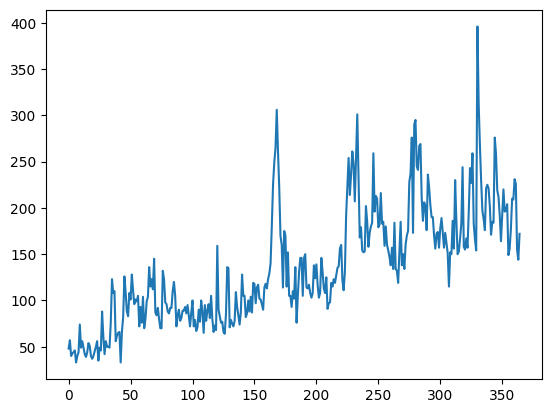

In [65]:
subs.plot()

<Axes: ylabel='lead'>

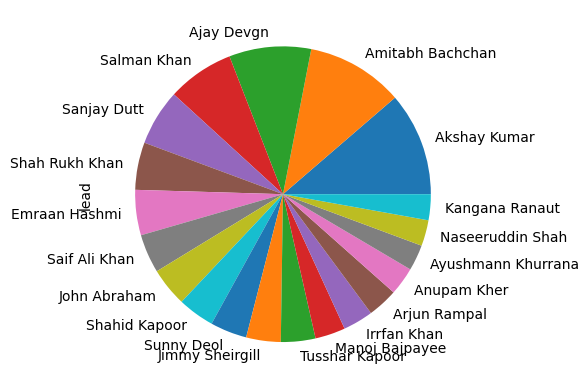

In [66]:
movies.value_counts().head(20).plot(kind='pie')

### Some Important Series Methods

In [67]:
# astype
# between
# clip
# drop_duplicates
# isnull
# dropna
# fillna
# isin
# apply
# copy

In [68]:
import numpy as np
import pandas as pd

In [69]:
subs = pd.read_csv(r"C:\Aditya Joshi\ML and DS\Datasets\subs.csv").squeeze()
subs

0       48
1       57
2       40
3       43
4       44
      ... 
360    231
361    226
362    155
363    144
364    172
Name: Subscribers gained, Length: 365, dtype: int64

In [70]:
vk = pd.read_csv(r"C:\Aditya Joshi\ML and DS\Datasets\kohli_ipl.csv",index_col='match_no').squeeze()
vk

match_no
1       1
2      23
3      13
4      12
5       1
       ..
211     0
212    20
213    73
214    25
215     7
Name: runs, Length: 215, dtype: int64

In [71]:
movies = pd.read_csv(r"C:\Aditya Joshi\ML and DS\Datasets\bollywood.csv",index_col='movie').squeeze()
movies

movie
Uri: The Surgical Strike                   Vicky Kaushal
Battalion 609                                Vicky Ahuja
The Accidental Prime Minister (film)         Anupam Kher
Why Cheat India                            Emraan Hashmi
Evening Shadows                         Mona Ambegaonkar
                                              ...       
Hum Tumhare Hain Sanam                    Shah Rukh Khan
Aankhen (2002 film)                     Amitabh Bachchan
Saathiya (film)                             Vivek Oberoi
Company (film)                                Ajay Devgn
Awara Paagal Deewana                        Akshay Kumar
Name: lead, Length: 1500, dtype: object

In [72]:
# astype
import sys
sys.getsizeof(vk)

3472

In [73]:
sys.getsizeof(vk.astype('int16'))

2182

In [74]:
# between
vk[vk.between(51,99)]

match_no
34     58
41     71
44     56
45     67
52     70
57     57
68     73
71     51
73     58
74     65
80     57
81     93
82     99
85     56
97     67
99     73
103    51
104    62
110    82
116    75
117    79
119    80
122    52
127    75
129    54
131    54
132    62
134    64
137    55
141    58
144    57
145    92
148    68
152    70
160    84
162    67
175    72
178    90
188    72
197    51
198    53
209    58
213    73
Name: runs, dtype: int64

In [75]:
# clip
subs

0       48
1       57
2       40
3       43
4       44
      ... 
360    231
361    226
362    155
363    144
364    172
Name: Subscribers gained, Length: 365, dtype: int64

In [76]:
subs.clip(100,200)

# for values less than 100; 100 is substituted. For values more than 200; 200 is substituted.

0      100
1      100
2      100
3      100
4      100
      ... 
360    200
361    200
362    155
363    144
364    172
Name: Subscribers gained, Length: 365, dtype: int64

In [77]:
# drop_duplicates

# By default, it keeps the first occurrence. You can change that.

temp = pd.Series([1,1,2,2,3,3,4,4])
temp

0    1
1    1
2    2
3    2
4    3
5    3
6    4
7    4
dtype: int64

In [78]:
temp.drop_duplicates(keep='last')

1    1
3    2
5    3
7    4
dtype: int64

In [79]:
temp.duplicated()

# .duplicated() returns a Boolean series. 

0    False
1     True
2    False
3     True
4    False
5     True
6    False
7     True
dtype: bool

In [80]:
print(vk.sum())
print()
print(vk.duplicated().sum())
vk.duplicated()

# Notice that sum() adds 1 for True and 0 for False. 
# So basically, you count number of duplicates by summing the boolean series.

6634

137


match_no
1      False
2      False
3      False
4      False
5       True
       ...  
211     True
212     True
213     True
214     True
215     True
Name: runs, Length: 215, dtype: bool

In [81]:
movies.drop_duplicates()

# As you would've guessed, it deletes the duplicates.

movie
Uri: The Surgical Strike                   Vicky Kaushal
Battalion 609                                Vicky Ahuja
The Accidental Prime Minister (film)         Anupam Kher
Why Cheat India                            Emraan Hashmi
Evening Shadows                         Mona Ambegaonkar
                                              ...       
Sssshhh...                              Tanishaa Mukerji
Rules: Pyaar Ka Superhit Formula                  Tanuja
Right Here Right Now (film)                        Ankit
Talaash: The Hunt Begins...                Rakhee Gulzar
The Pink Mirror                          Edwin Fernandes
Name: lead, Length: 566, dtype: object

In [82]:
temp = pd.Series([1,2,3,np.nan,5,6,np.nan,8,np.nan,10])
temp

0     1.0
1     2.0
2     3.0
3     NaN
4     5.0
5     6.0
6     NaN
7     8.0
8     NaN
9    10.0
dtype: float64

In [83]:
temp.size
# size counts NaN values.

10

In [84]:
temp.count()
# count doesn;t count NaN values.

7

In [85]:
# isnull
print(temp)
temp.isnull()

# isnull() returns True for NaN or None values

0     1.0
1     2.0
2     3.0
3     NaN
4     5.0
5     6.0
6     NaN
7     8.0
8     NaN
9    10.0
dtype: float64


0    False
1    False
2    False
3     True
4    False
5    False
6     True
7    False
8     True
9    False
dtype: bool

In [86]:
temp.isnull().sum()

3

In [87]:
# dropna - deletes the NaN entries.

# Note - It doesn't reconfigure the index column, even if it has default indices. 

temp.dropna()

0     1.0
1     2.0
2     3.0
4     5.0
5     6.0
7     8.0
9    10.0
dtype: float64

In [88]:
# fillna

# You can fill the NaN values with something. Here, we fill it with the mean of the series.
temp.fillna(temp.mean())

0     1.0
1     2.0
2     3.0
3     5.0
4     5.0
5     6.0
6     5.0
7     8.0
8     5.0
9    10.0
dtype: float64

In [89]:
# isin
vk[(vk == 49) | (vk == 99)]

match_no
82    99
86    49
Name: runs, dtype: int64

In [90]:
print(vk.isin([49,99]))
vk[vk.isin([49,99])]

match_no
1      False
2      False
3      False
4      False
5      False
       ...  
211    False
212    False
213    False
214    False
215    False
Name: runs, Length: 215, dtype: bool


match_no
82    99
86    49
Name: runs, dtype: int64

In [91]:
# apply
movies

movie
Uri: The Surgical Strike                   Vicky Kaushal
Battalion 609                                Vicky Ahuja
The Accidental Prime Minister (film)         Anupam Kher
Why Cheat India                            Emraan Hashmi
Evening Shadows                         Mona Ambegaonkar
                                              ...       
Hum Tumhare Hain Sanam                    Shah Rukh Khan
Aankhen (2002 film)                     Amitabh Bachchan
Saathiya (film)                             Vivek Oberoi
Company (film)                                Ajay Devgn
Awara Paagal Deewana                        Akshay Kumar
Name: lead, Length: 1500, dtype: object

In [92]:
print(movies.apply(lambda x:x.split()[0].upper()))
# This works like the map function. But, it doesn't modify the original

movies

movie
Uri: The Surgical Strike                  VICKY
Battalion 609                             VICKY
The Accidental Prime Minister (film)     ANUPAM
Why Cheat India                          EMRAAN
Evening Shadows                            MONA
                                         ...   
Hum Tumhare Hain Sanam                     SHAH
Aankhen (2002 film)                     AMITABH
Saathiya (film)                           VIVEK
Company (film)                             AJAY
Awara Paagal Deewana                     AKSHAY
Name: lead, Length: 1500, dtype: object


movie
Uri: The Surgical Strike                   Vicky Kaushal
Battalion 609                                Vicky Ahuja
The Accidental Prime Minister (film)         Anupam Kher
Why Cheat India                            Emraan Hashmi
Evening Shadows                         Mona Ambegaonkar
                                              ...       
Hum Tumhare Hain Sanam                    Shah Rukh Khan
Aankhen (2002 film)                     Amitabh Bachchan
Saathiya (film)                             Vivek Oberoi
Company (film)                                Ajay Devgn
Awara Paagal Deewana                        Akshay Kumar
Name: lead, Length: 1500, dtype: object

In [93]:
subs

0       48
1       57
2       40
3       43
4       44
      ... 
360    231
361    226
362    155
363    144
364    172
Name: Subscribers gained, Length: 365, dtype: int64

In [94]:
subs.apply(lambda x:'good day' if x > subs.mean() else 'bad day')

0       bad day
1       bad day
2       bad day
3       bad day
4       bad day
         ...   
360    good day
361    good day
362    good day
363    good day
364    good day
Name: Subscribers gained, Length: 365, dtype: object

In [95]:
subs.mean()

135.64383561643837

In [96]:
# copy

In [97]:
vk

match_no
1       1
2      23
3      13
4      12
5       1
       ..
211     0
212    20
213    73
214    25
215     7
Name: runs, Length: 215, dtype: int64

In [98]:
new = vk.head()

In [99]:
new

match_no
1     1
2    23
3    13
4    12
5     1
Name: runs, dtype: int64

In [100]:
new[1] = 9
print(new)
print(vk)

# Note that arrays work like lists. The assignment operator doesn't copy them. It give a referrence.
# Also, the head() and tail() function return the reference to some part of the array. It doesn't copy.

match_no
1     9
2    23
3    13
4    12
5     1
Name: runs, dtype: int64
match_no
1       9
2      23
3      13
4      12
5       1
       ..
211     0
212    20
213    73
214    25
215     7
Name: runs, Length: 215, dtype: int64


In [101]:
new = vk.head().copy()

In [102]:
new[1] = 100

In [103]:
new

match_no
1    100
2     23
3     13
4     12
5      1
Name: runs, dtype: int64

In [104]:
vk

match_no
1       9
2      23
3      13
4      12
5       1
       ..
211     0
212    20
213    73
214    25
215     7
Name: runs, Length: 215, dtype: int64